In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import f_oneway, kruskal
import scikit_posthocs as spost
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from IPython.display import HTML

This project asks a simple but intriguing question: do the same biases that shape our real-world preferences also influence how we rank fictional anthropomorphic characters in Animal Crossing? Behind the game's charming aesthetics and playful world, patterns of favoritism may reveal deeper cultural influences. By analysing how traits like species, personality types, and gender relate to villager popularity, the aim is to uncover whether players tend to gravitate more toward cuteness, rarity, or personality - and whether these preferences reflect familiar standards of social appeal, consciously or not. In doing so, this work offers a window into how human biases quietly seep into even the most whimsical virtual spaces. A detailed Medium article is available here: https://medium.com/@laureenmekuilm/unpacking-animal-crossing-villager-preferences-a-data-driven-approach-to-trends-and-tiers-af9320576195

In [3]:
pd.reset_option('display.max_rows')

## Preprocessing

In [4]:
data = pd.read_csv('villager_data_final.csv')
data

,name,rank,tier,Name,Species,Gender,Personality,Birthday,Catchphrase
0,Marshal,1,Tier 1,Marshal,Squirrel,Male,Smug (A),September 29,sulky
1,Raymond,2,Tier 1,Raymond,Cat,Male,Smug (B),October 1,crisp
2,Shino,3,Tier 1,Shino,Deer,Female,Peppy (A),October 31,okaaay
3,Stitches,4,Tier 1,Stitches,Bear cub,Male,Lazy (B),February 10,stuffin'
4,Bob,5,Tier 1,Bob,Cat,Male,Lazy (B),January 1,pthhpth
...,...,...,...,...,...,...,...,...,...
408,Greta,409,Tier 6,Greta,Mouse,Female,Snooty (A),September 5,yelp
409,Queenie,410,Tier 6,Queenie,Ostrich,Female,Snooty (B),November 13,chicken
410,Bitty,411,Tier 6,Bitty,Hippo,Female,Snooty (A),October 6,my dear
411,Toby,412,Tier 6,Toby,Rabbit,Male,Smug (A),July 10,ribbit


In [5]:
data[data.isnull().any(axis=1)]

,name,rank,tier,Name,Species,Gender,Personality,Birthday,Catchphrase
88,OHare,89,Tier 4,NaN,NaN,NaN,NaN,NaN,NaN
225,Buck(Brows),226,Tier 5,NaN,NaN,NaN,NaN,NaN,NaN
338,WartJr,339,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN
353,Crackle(Spork),354,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.drop('Name', axis=1, inplace=True)
data.rename(columns={'name': 'Name'}, inplace=True)
data.rename(columns={'rank': 'Rank', 'tier':'Tier'}, inplace=True)

In [7]:
data.iloc[88]= ["O'Hare", 89, 'Tier 4', 'Rabbit', 'Male', 'Smug (B)', 'July 24', 'amigo']
data.iloc[225]= ['Buck', 226, 'Tier 5', 'Horse', 'Male', 'Jock (B)', 'April 4', 'pardner']
data.iloc[338]= ['Wart Jr.', 339, 'Tier 6', 'Frog', 'Male', 'Cranky (B)', 'August 21', 'grr-ribbit']
data.iloc[353]= ['Spork', 354, 'Tier 6', 'Pig', 'Male', 'Lazy (B)', 'September 3', 'snork']

In [8]:
data.to_csv('villager_data_.csv')

## Univariate analysis

In [9]:
data.describe(include='all')

,Name,Rank,Tier,Species,Gender,Personality,Birthday,Catchphrase
count,413,413.000000,413,413,413,413,413,413
unique,413,NaN,6,36,2,16,364,409
top,Marshal,NaN,Tier 6,Cat,Male,Normal (B),August 18,sweetie
freq,1,NaN,163,23,214,40,2,2
mean,NaN,207.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,119.367081,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,207.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,310.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Personality

In [10]:
data['Personality'].describe()

count            413
unique            16
top       Normal (B)
freq              40
Name: Personality, dtype: object

<Axes: xlabel='Personality'>

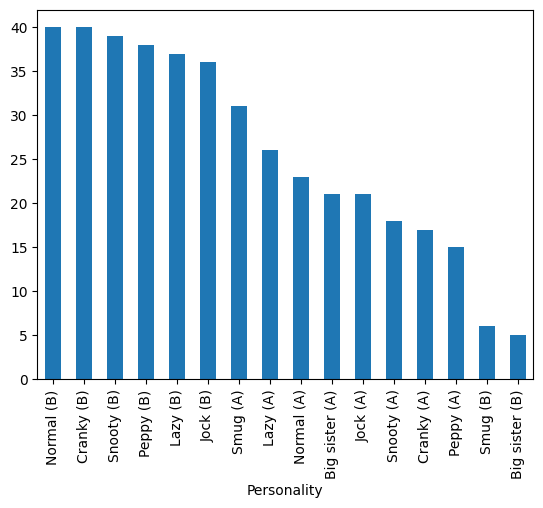

In [11]:
data['Personality'].value_counts().plot(kind='bar') 

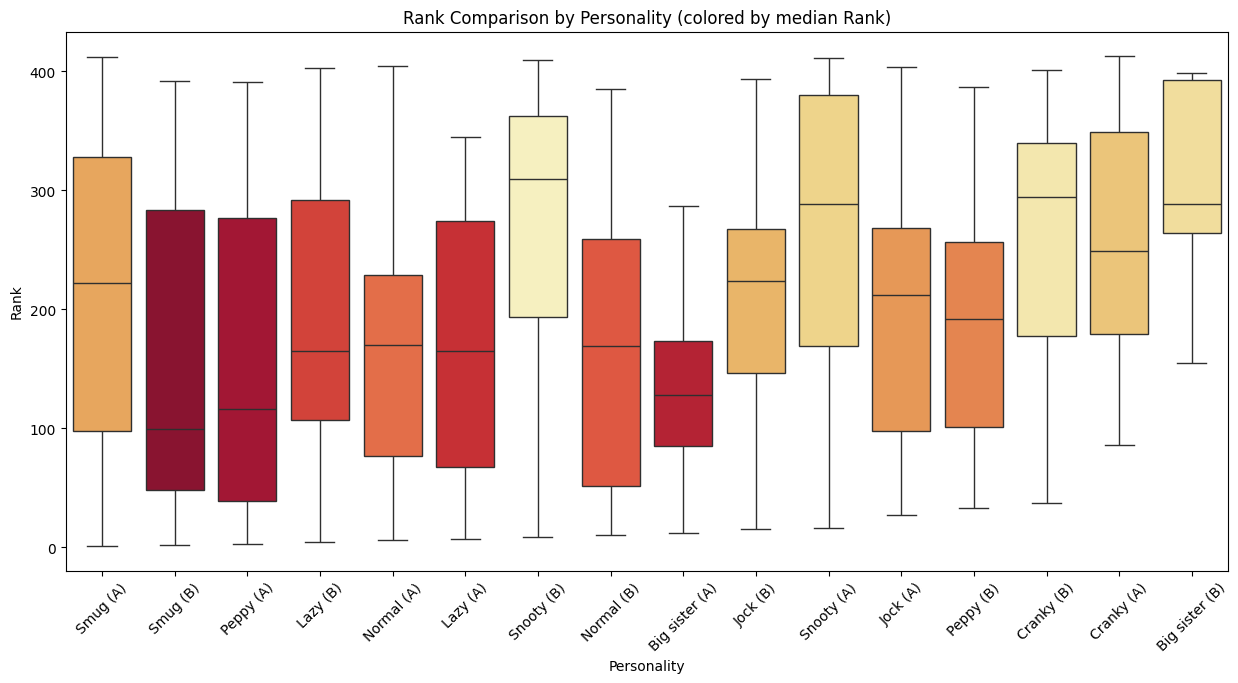

In [47]:
p_medians = data.groupby('Personality')['Rank'].median().sort_values()
p_palette = sns.color_palette("YlOrRd_r", n_colors=len(p_medians))
pers_palette = dict(zip(p_medians.index, p_palette))

plt.figure(figsize=(15, 7))
ax = sns.boxplot(x='Personality', y='Rank',hue = 'Personality', data=data, palette=pers_palette, legend=False)
plt.title("Rank Comparison by Personality (colored by median Rank)")
plt.xticks(rotation=45)
plt.show()


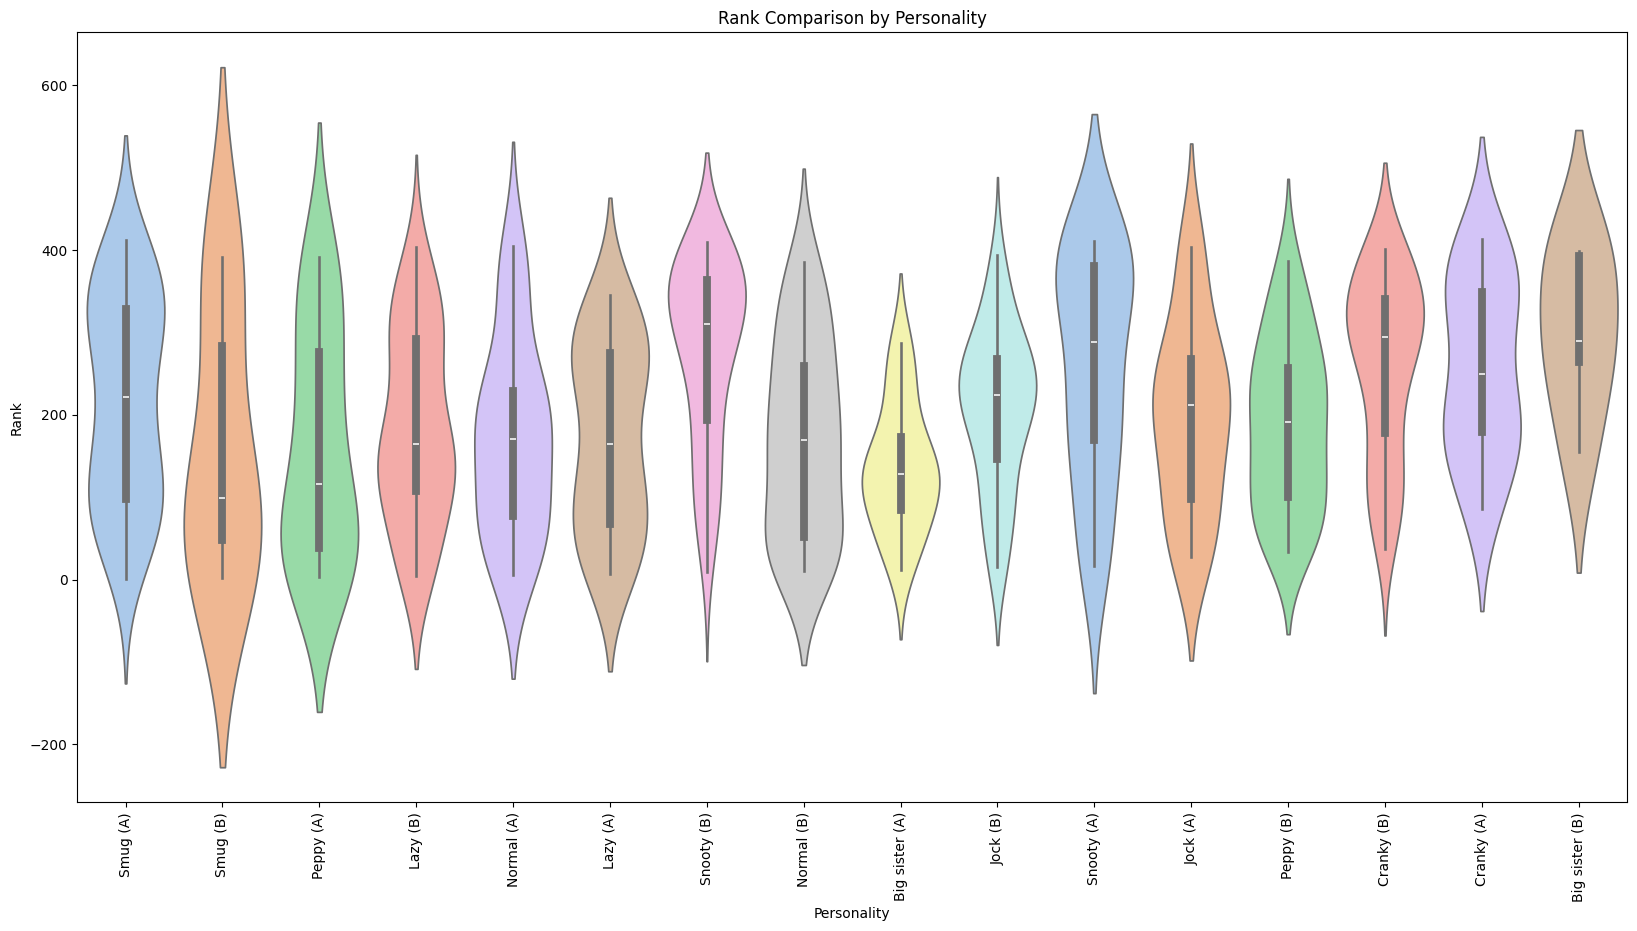

In [13]:
plt.figure(figsize=(20, 10))
ax = sns.violinplot(x='Personality', y='Rank', data=data, inner="box", hue='Personality', palette='pastel', legend=False)  
plt.title("Rank Comparison by Personality")
plt.xticks(rotation=90)
plt.show()

In [50]:
#Median ranks by Personality

pd.set_option('display.max_rows', None)

data.groupby(['Personality'])['Rank'].agg(['median', 'count']).sort_values(by = 'median')

,median,count
Personality,,
Smug (B),99.0,6
Peppy (A),116.0,15
Big sister (A),128.0,21
Lazy (A),165.0,26
Lazy (B),165.0,37
Normal (B),169.0,40
Normal (A),170.0,23
Peppy (B),191.5,38
Jock (A),212.0,21


-- Fun fact --

All lazy, smug, cranky, and jock characters are male, and all peppy, snooty, normal, and big sister characters are female.

In [14]:
for personality in data['Personality'].unique():
    count = data.loc[data['Personality'] == personality, 'Gender'].value_counts()
    print(f' -- {personality} : {count}')

 -- Smug (A) : Gender
Male    31
Name: count, dtype: int64
 -- Smug (B) : Gender
Male    6
Name: count, dtype: int64
 -- Peppy (A) : Gender
Female    15
Name: count, dtype: int64
 -- Lazy (B) : Gender
Male    37
Name: count, dtype: int64
 -- Normal (A) : Gender
Female    23
Name: count, dtype: int64
 -- Lazy (A) : Gender
Male    26
Name: count, dtype: int64
 -- Snooty (B) : Gender
Female    39
Name: count, dtype: int64
 -- Normal (B) : Gender
Female    40
Name: count, dtype: int64
 -- Big sister (A) : Gender
Female    21
Name: count, dtype: int64
 -- Jock (B) : Gender
Male    36
Name: count, dtype: int64
 -- Snooty (A) : Gender
Female    18
Name: count, dtype: int64
 -- Jock (A) : Gender
Male    21
Name: count, dtype: int64
 -- Peppy (B) : Gender
Female    38
Name: count, dtype: int64
 -- Cranky (B) : Gender
Male    40
Name: count, dtype: int64
 -- Cranky (A) : Gender
Male    17
Name: count, dtype: int64
 -- Big sister (B) : Gender
Female    5
Name: count, dtype: int64


### Species

In [15]:
data['Species'].describe()

count     413
unique     36
top       Cat
freq       23
Name: Species, dtype: object

<Axes: xlabel='Species'>

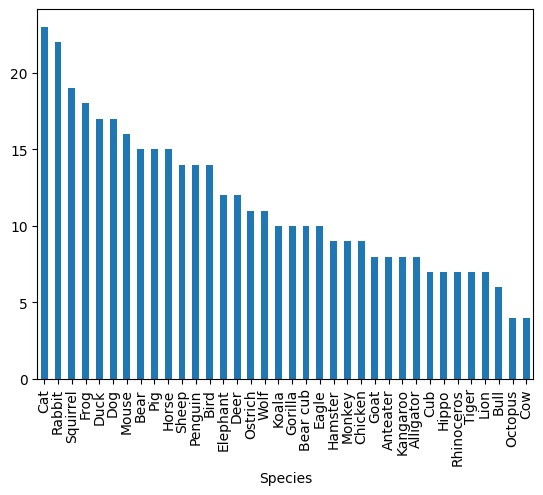

In [16]:
data['Species'].value_counts().plot(kind='bar')

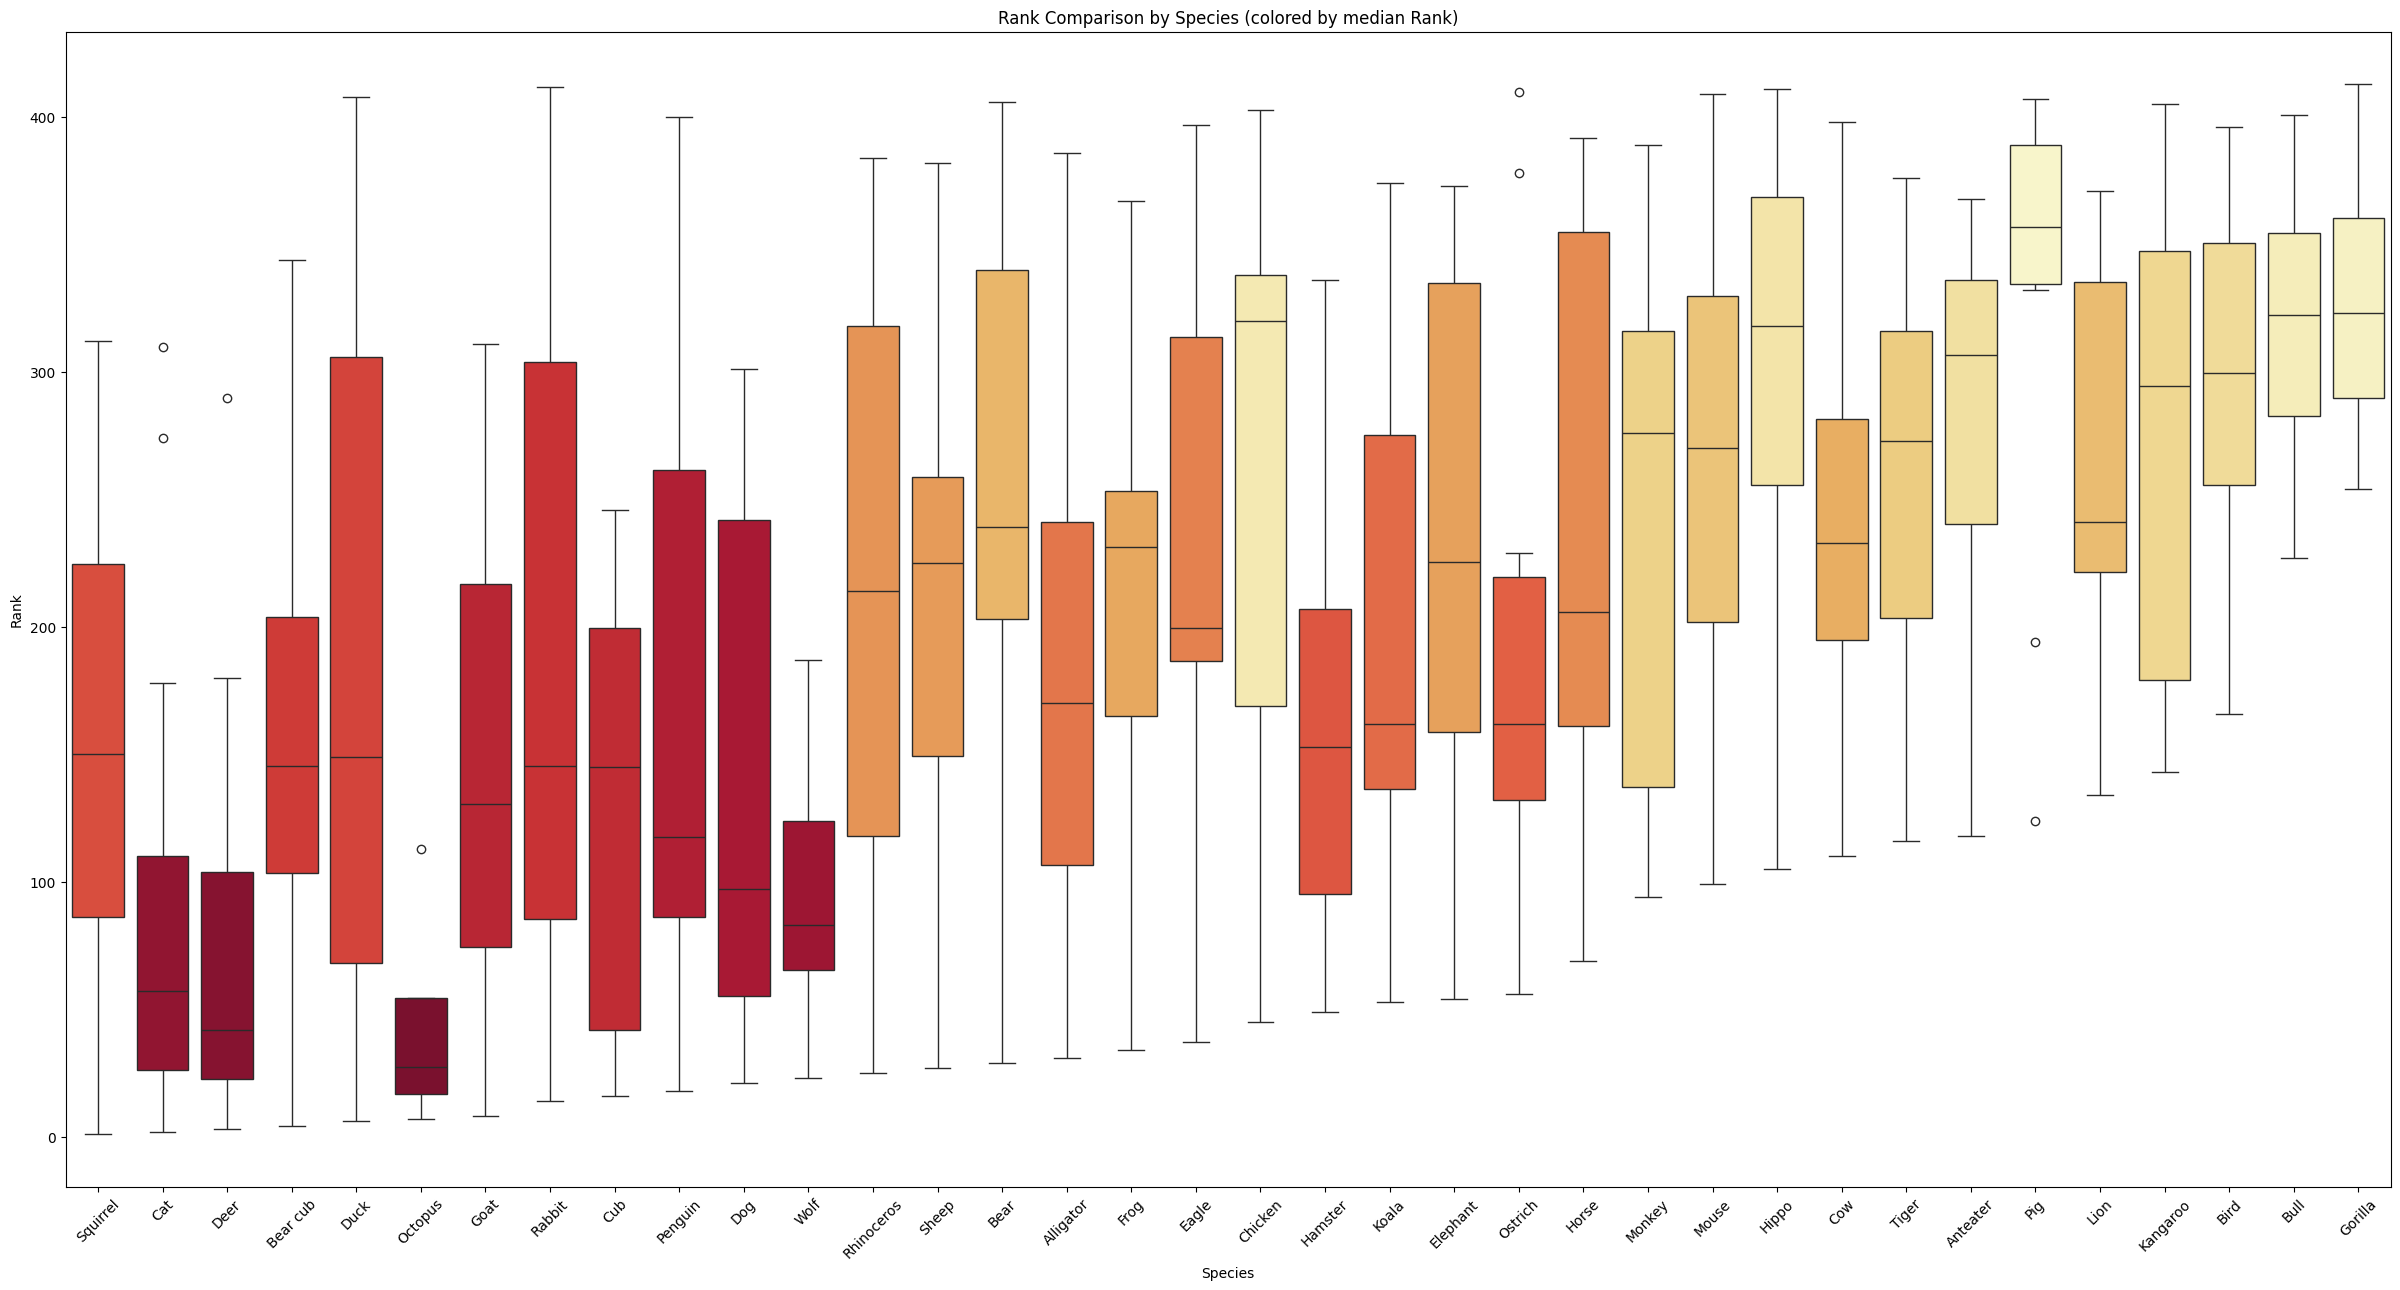

In [17]:
s_medians = data.groupby('Species')['Rank'].median().sort_values()
s_palette = sns.color_palette("YlOrRd_r", n_colors=len(s_medians))
species_palette = dict(zip(s_medians.index, s_palette))

plt.figure(figsize=(30, 15))
ax = sns.boxplot(x='Species', y='Rank', data=data, hue = 'Species', palette=species_palette, legend=False)
plt.title("Rank Comparison by Species (colored by median Rank)")
plt.xticks(rotation=45)
plt.show()


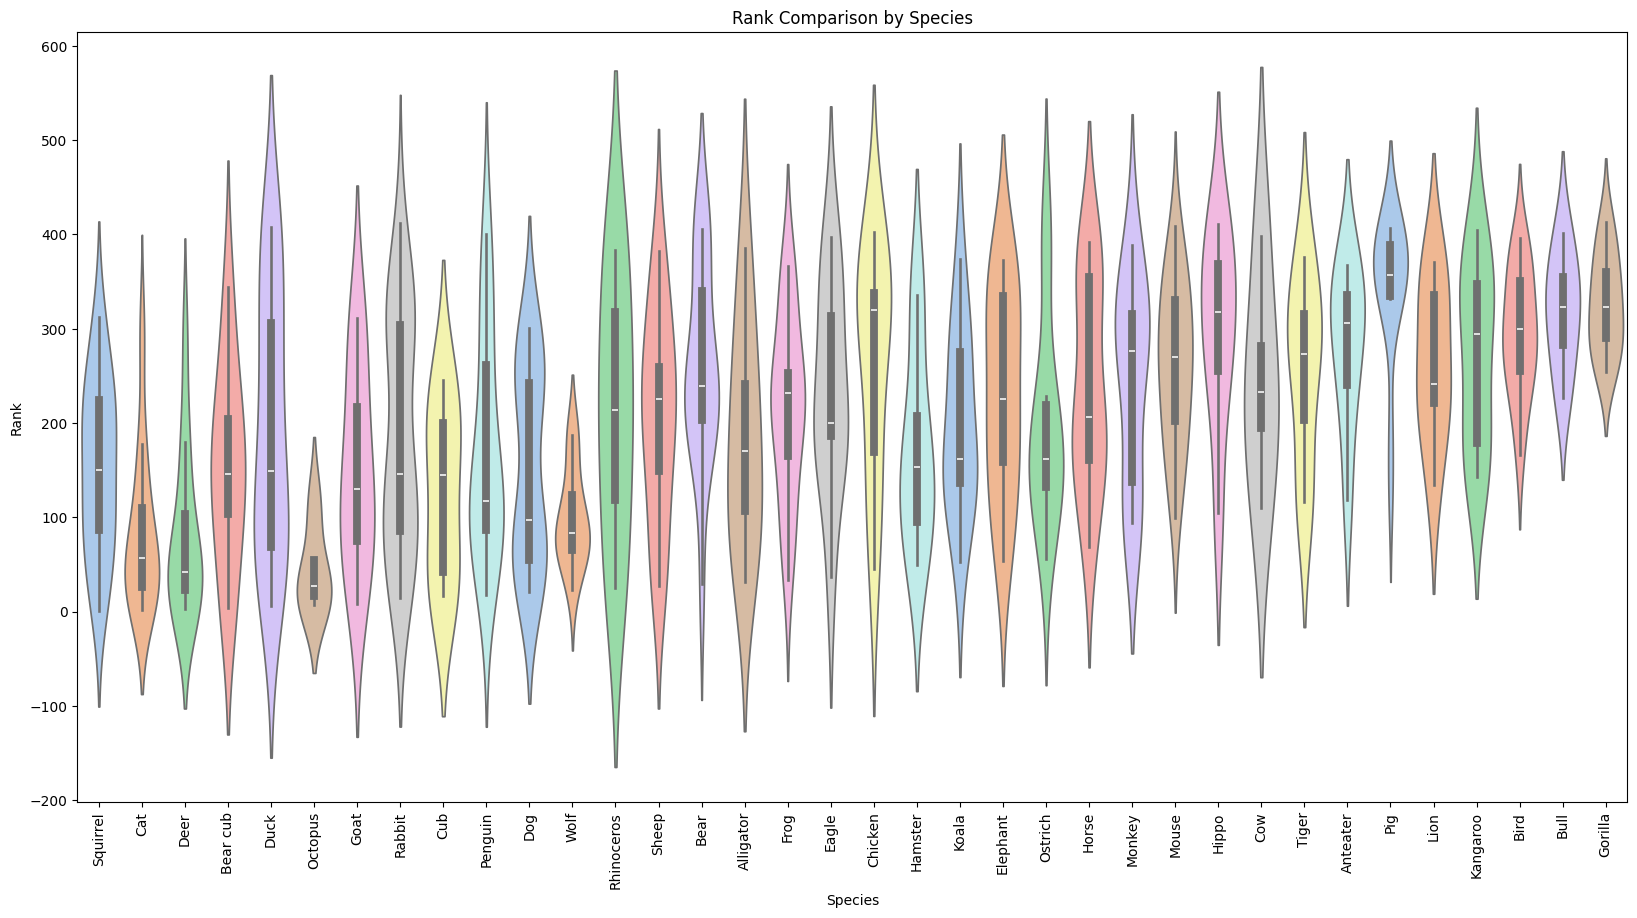

In [18]:
plt.figure(figsize=(20, 10))
ax = sns.violinplot(x='Species', y='Rank', data=data, inner="box", hue='Species', palette='pastel', legend=False)  
plt.title("Rank Comparison by Species")
plt.xticks(rotation=90)
plt.show()

In [49]:
#Median ranks by species

pd.set_option('display.max_rows', None)

data.groupby(['Species'])['Rank'].agg(['median', 'count']).sort_values(by = 'median')

,median,count
Species,,
Octopus,27.5,4
Deer,42.0,12
Cat,57.0,23
Wolf,83.0,11
Dog,97.0,17
Penguin,117.5,14
Goat,130.5,8
Cub,145.0,7
Rabbit,145.5,22


### Tier

In [19]:
data['Tier'].value_counts()

Tier
Tier 6    163
Tier 5    120
Tier 4     60
Tier 3     30
Tier 2     25
Tier 1     15
Name: count, dtype: int64

<Axes: xlabel='Tier'>

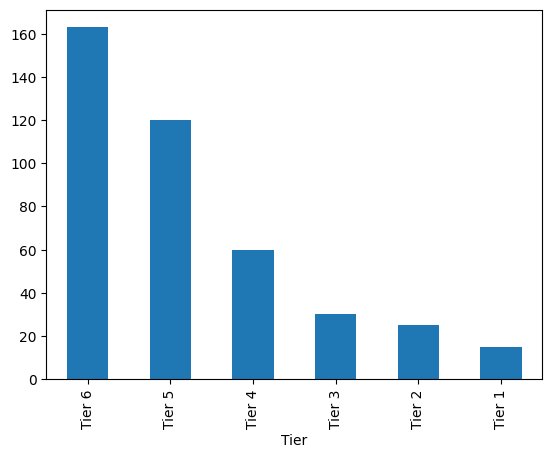

In [20]:
data['Tier'].value_counts().plot(kind='bar')

### Gender

In [21]:
data['Gender'].value_counts(normalize=True)

Gender
Male      0.51816
Female    0.48184
Name: proportion, dtype: float64

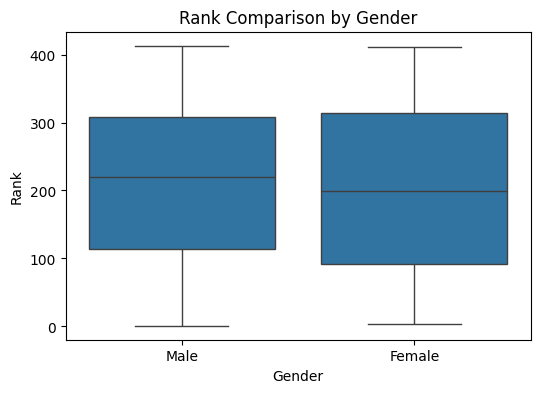

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Rank', data=data)
plt.title("Rank Comparison by Gender")
plt.show()

In [23]:
from scipy.stats import mannwhitneyu

male_ranks = data[data['Gender'] == 'Male']['Rank']
female_ranks = data[data['Gender'] == 'Female']['Rank']

# Perform Mann-Whitney U test (Wilcoxon rank-sum test)
u_stat, p_value = mannwhitneyu(male_ranks, female_ranks, alternative='greater')

print(f"Mann-Whitney U Statistic: {u_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Males have significantly higher ranks on average.")
else:
    print("No significant difference in rank between genders.")


Mann-Whitney U Statistic: 22360.00, p-value: 0.1895
No significant difference in rank between genders.


Males are generally ranked higher, as showned by their slightly higher median. Females have a more varied ranking (taller and wider box).
However, the Wilcoxon rank-sum test shows that this difference is not statistically significant (p-value > 0.05). Therefore, the bias in ranking does not seem to come from gender.

### Calculating occurence/rarity

In [24]:
personality_counts = data['Personality'].value_counts(normalize= True)
pers_median_ranks = data.groupby('Personality')['Rank'].median().sort_values(ascending=False)

In [25]:
Personality = pd.DataFrame()
Personality['Median Rank'] = pers_median_ranks
Personality['Normalised Count'] = personality_counts

In [26]:
species_counts = data['Species'].value_counts(normalize= True)
species_median_ranks = data.groupby('Species')['Rank'].median().sort_values(ascending=False)

In [27]:
Species = pd.DataFrame()
Species['Median Rank'] = species_median_ranks
Species['Normalised Count'] = species_counts

In [28]:
def set_thresholds(series):

    most_common_threshold = series.quantile(0.75)
    least_common_threshold = series.quantile(0.25)

    return most_common_threshold, least_common_threshold


def categorise_value(most_common_threshold, least_common_threshold, value):

    if value >= most_common_threshold:
        return 'Most common'
    elif value <= least_common_threshold:
        return 'Least common'
    else:
        return 'Average'

In [29]:
most_common_p, least_common_p = set_thresholds(Personality['Normalised Count'])
most_common_s, least_common_s = set_thresholds(Species['Normalised Count'])

In [30]:
Personality['Rarity'] = Personality['Normalised Count'].apply(
    lambda x: categorise_value(most_common_p, least_common_p, x)
)

Species['Rarity'] = Species['Normalised Count'].apply(
    lambda x: categorise_value(most_common_s, least_common_s, x)
)

In [31]:
Personality.sort_values(by= 'Normalised Count', ascending = False) 

,Median Rank,Normalised Count,Rarity
Personality,,,
Cranky (B),294.5,0.096852,Most common
Normal (B),169.0,0.096852,Most common
Snooty (B),310.0,0.094431,Most common
Peppy (B),191.5,0.092010,Most common
Lazy (B),165.0,0.089588,Average
Jock (B),223.5,0.087167,Average
Smug (A),222.0,0.075061,Average
Lazy (A),165.0,0.062954,Average
Normal (A),170.0,0.055690,Average


In [32]:
Species.sort_values(by= 'Normalised Count', ascending = False)

,Median Rank,Normalised Count,Rarity
Species,,,
Cat,57.0,0.055690,Most common
Rabbit,145.5,0.053269,Most common
Squirrel,150.0,0.046005,Most common
Frog,231.5,0.043584,Most common
Dog,97.0,0.041162,Most common
Duck,149.0,0.041162,Most common
Mouse,270.0,0.038741,Most common
Pig,357.0,0.036320,Most common
Bear,239.0,0.036320,Most common


## Early conclusions

We have 6 tiers, 413 villagers (214 males, 199 females), 36 species, and 16 personalities.
It can be seen from the bar plots above that the tier is not random, judging by the non-uniformity of the counts. The same conclusion can be made for personality, gender, and species. we've seen that gender does not seem to be statistically significant towards rank. We can assume that the villagers birthdays, catchphrases, and names are also considered trivial for their ranking. Therefore, we can hypothesise that personality, and species are the influencing factors for the rank (and the tier).

### Appearance

The 5 averagely best ranked villagers have are octopuses, deers, cats, wolves, and dogs. This was calculated using a median rank by species; a mean rank could have been too sensitive to the outliers seen on the boxplot above.
These correspond also to some of the most popular characters i.e. those in Tier 1. They almost all seem to have soft, small and roundish features, as is the case for cats, deers, octopuses… and especially in Tier 1, they are mostly adorned with light, pastel colours.
A look at the less popular villagers reinforce this appearance bias theory as they appear to have bigger physical features, encountered in species such as hippos, pigs, bulls, gorillas or cows. Their design often have saturated or earthy colours. These characteristics are traditionally considered too bold and less attractive.

In [34]:
#Adding villager images to have a better grasp

images_df = pd.read_pickle('images_df.pkl')
del[images_df['Image path']]
df_final = pd.merge(data, images_df, how='left', left_on=['Name'], right_on=['Name'])

#Looking at the Tier 1 table only (Top 15)
HTML(df_final.head(15).to_html(escape=False))

,Name,Rank,Tier,Species,Gender,Personality,Birthday,Catchphrase,Image
0,Marshal,1,Tier 1,Squirrel,Male,Smug (A),September 29,sulky,
1,Raymond,2,Tier 1,Cat,Male,Smug (B),October 1,crisp,
2,Shino,3,Tier 1,Deer,Female,Peppy (A),October 31,okaaay,
3,Stitches,4,Tier 1,Bear cub,Male,Lazy (B),February 10,stuffin',
4,Bob,5,Tier 1,Cat,Male,Lazy (B),January 1,pthhpth,
5,Molly,6,Tier 1,Duck,Female,Normal (A),March 7,quackidee,
6,Zucker,7,Tier 1,Octopus,Male,Lazy (A),March 8,bloop,
7,Sherb,8,Tier 1,Goat,Male,Lazy (A),January 18,bawwww,
8,Ankha,9,Tier 1,Cat,Female,Snooty (B),September 22,me meow,
9,Lolly,10,Tier 1,Cat,Female,Normal (B),March 27,bonbon,


In [103]:
#Last 15

HTML(df_final.tail(15).to_html(escape=False))

,Name,Rank,Tier,Species,Gender,Personality,Birthday,Catchphrase,Image
398,Paula,399,Tier 6,Bear,Female,Big sister (B),March 22,yodelay,
399,Gwen,400,Tier 6,Penguin,Female,Snooty (B),January 23,h-h-h-hon,
400,T-Bone,401,Tier 6,Bull,Male,Cranky (B),May 20,moocher,
401,Mallary,402,Tier 6,Duck,Female,Snooty (B),November 17,quackpth,
402,Benedict,403,Tier 6,Chicken,Male,Lazy (B),October 10,uh-hoo,
403,Kevin,404,Tier 6,Pig,Male,Jock (A),April 26,weeweewee,
404,Carrie,405,Tier 6,Kangaroo,Female,Normal (A),December 5,little one,
405,Ike,406,Tier 6,Bear,Male,Cranky (A),May 16,roadie,
406,Chops,407,Tier 6,Pig,Male,Smug (A),October 13,zoink,
407,Gloria,408,Tier 6,Duck,Female,Snooty (B),August 12,quacker,


<Axes: title={'center': 'Count of unique species in the top 15'}, xlabel='Species'>

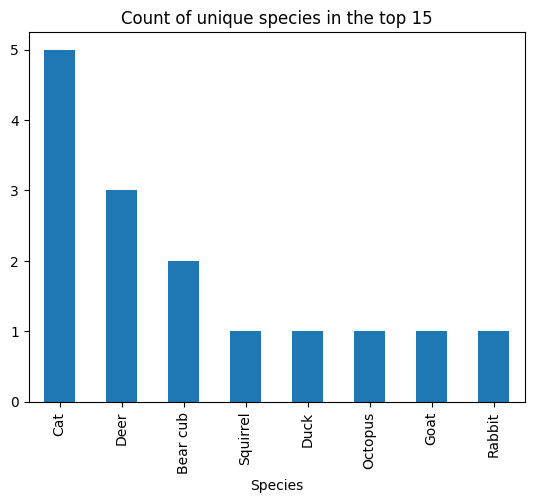

In [51]:
df_final['Species'].head(15).value_counts().plot(kind='bar', title='Count of unique species in the top 15')

<Axes: title={'center': 'Count of unique species in the last 15'}, xlabel='Species'>

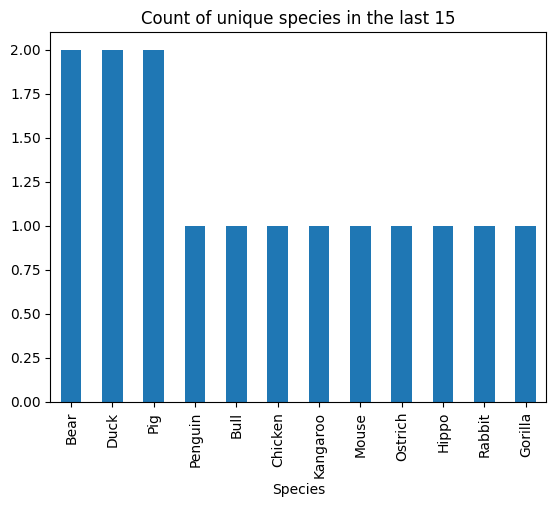

In [52]:
df_final['Species'].tail(15).value_counts().plot(kind='bar', title='Count of unique species in the last 15')

In [55]:
#Comparing species in the top and last 15

head_sp = set(df_final['Species'].tail(15).unique())

tail_sp = set(df_final['Species'].head(15).unique())

head_sp & tail_sp

{'Duck', 'Rabbit'}

Comparing the species from the top 15 (Tier 1) villagers with the last 15 (belonging to Tier 6), we can see that only 2 appear in both sets: ducks and rabbits. Species therefore truly appear very polarised in terms of ranking. Some species particularly, and therefore certain looks and features, in particular neotenic-like  looks, tend to be more popular among users.

### Personality

The 5 averagely best ranked villagers have a Smug (B) , Peppy (A), Big sister (A), Lazy (A) or Lazy (B) personality type. A median rank by personality was used here as well. It can be noticed however that these personality types are not dominant in the top 15, with only have 1 villager each.

Furthermore,  4 personality types appear in both the top 15 (Tier 1) and the last 15 (belonging to Tier 6) sets: {'Lazy (B)', 'Normal (A)', 'Smug (A)', 'Snooty (B)'}. This is almost 1/3 of each set.

Personality types tend to be much less polarised in terms of ranking than species. There are less differences between the species from the top 15 and the last 15, which translates the idea that personality types alone do not strongly dictate popularity. The same personality type can be present in both highly loved and disliked villagers - maybe because players focus more on other traits when deciding, like their looks. This aligns with our hypothesis about appearance bias.

<Axes: title={'center': 'Count of unique types in the top 15'}, xlabel='Personality'>

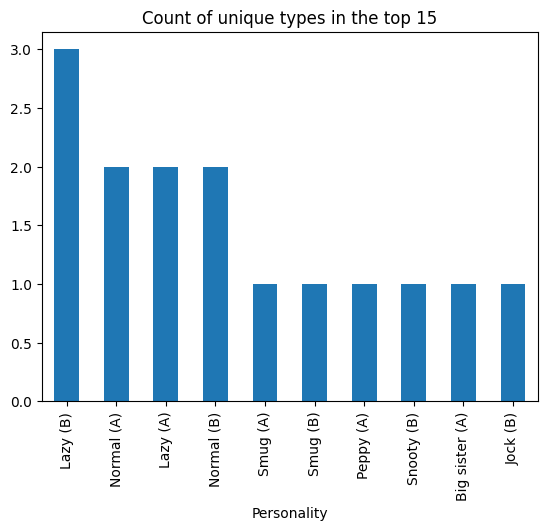

In [53]:
df_final['Personality'].head(15).value_counts().plot(kind='bar', title='Count of unique types in the top 15')

<Axes: title={'center': 'Count of unique types in the last 15'}, xlabel='Personality'>

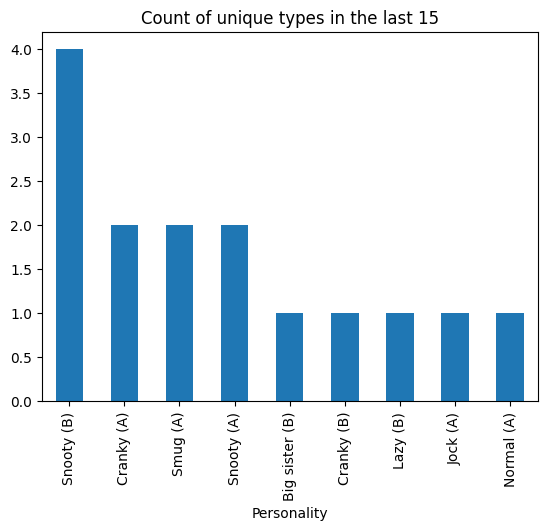

In [54]:
df_final['Personality'].tail(15).value_counts().plot(kind='bar', title='Count of unique types in the last 15')

In [109]:
#Comparing personality types in the top and last 15

head_pt = set(df_final['Personality'].tail(15).unique())

tail_pt = set(df_final['Personality'].head(15).unique())

head_pt & tail_pt

{'Lazy (B)', 'Normal (A)', 'Smug (A)', 'Snooty (B)'}

## Bias study: correlation between different features and their significance

Our data is not normal and our samples are small. We will therefore use the non-parametric Kruskal-Wallis test instead of ANOVA to test if there are statistically significant differences of Rank between multiple groups of each independent variables (Species, Personality, Gender). We then get a measure of that difference's effect size, in the case it was found to be statistically significant, by using epsilon-squared ε². The purpose of this is to identify the independent variable mostly influencing our dependent variable Rank by the level of explainability it offers of the Rank's variance. Then to know exactly which groups (subsets of each independent variables) are significantly different, we use Dunn's post hoc test. This test ranks all values, calculate mean ranks per group, compare all pairs of groups, adjust p-values (to control false positives), then outputs which pairs differ.

In [114]:
p_values_dict = {}

# Define the Kruskal-Wallis test with Dunn's post-hoc
def kruskal_epsilon_dunn(data, cat_col, num_col):
    # Kruskal-Wallis test with Epsilon squared effect size
    groups = [group[num_col].values for _, group in data.groupby(cat_col)]
    h_stat, p_val = kruskal(*groups)

    k= len(groups)
    N= len(data)
    epsilon_squared = (h_stat - (k - 1)) / (N - k)
    print(f"\n{cat_col} - Kruskal-Wallis H: {h_stat:.2f}, p = {p_val:.4f}, ε² ≈ {epsilon_squared:.2f}")

    # Post-hoc Dunn's test (only if Kruskal is significant)
    if p_val < 0.05:
        print("Significant! Running Dunn's post-hoc test...")
        dunn = spost.posthoc_dunn(data, val_col=num_col, group_col=cat_col, p_adjust='bonferroni')
        print("\nDunn’s Test (p-values):")
        print(dunn)
        return dunn
    else:
        print("Not significant. Skipping post-hoc test.")
        return None

# Run Kruskal-Wallis and Dunn's test for each categorical column
for col in ['Personality', 'Species', 'Gender']:
    dunn_results = kruskal_epsilon_dunn(data, col, 'Rank')
    if dunn_results is not None:
        p_values_dict[col] = dunn_results



Personality - Kruskal-Wallis H: 49.91, p = 0.0000, ε² ≈ 0.09
Significant! Running Dunn's post-hoc test...

Dunn’s Test (p-values):
                Big sister (A)  Big sister (B)  Cranky (A)  Cranky (B)  \
Big sister (A)        1.000000        0.701737    0.238475    0.017244   
Big sister (B)        0.701737        1.000000    1.000000    1.000000   
Cranky (A)            0.238475        1.000000    1.000000    1.000000   
Cranky (B)            0.017244        1.000000    1.000000    1.000000   
Jock (A)              1.000000        1.000000    1.000000    1.000000   
Jock (B)              1.000000        1.000000    1.000000    1.000000   
Lazy (A)              1.000000        1.000000    1.000000    0.594490   
Lazy (B)              1.000000        1.000000    1.000000    0.809265   
Normal (A)            1.000000        1.000000    1.000000    0.663663   
Normal (B)            1.000000        1.000000    1.000000    0.138426   
Peppy (A)             1.000000        1.000000    1.00

Both Species and Personality are found to have groups with statistically significant differences towards Rank, but not Genre. Species is however way more significant in terms of size with an ε² ≈ 0.27 (large), compared to personality with an ε² ≈ 0.09 (medium). This means that for Species, 27% of the Rank's variance is explained by group differences, i.e. there are strong differences among groups. For Personality, only 9% of the Rank's variance is explained by group differences. This confirms our previous observations about Species influencing more the villagers ranking than Personality.

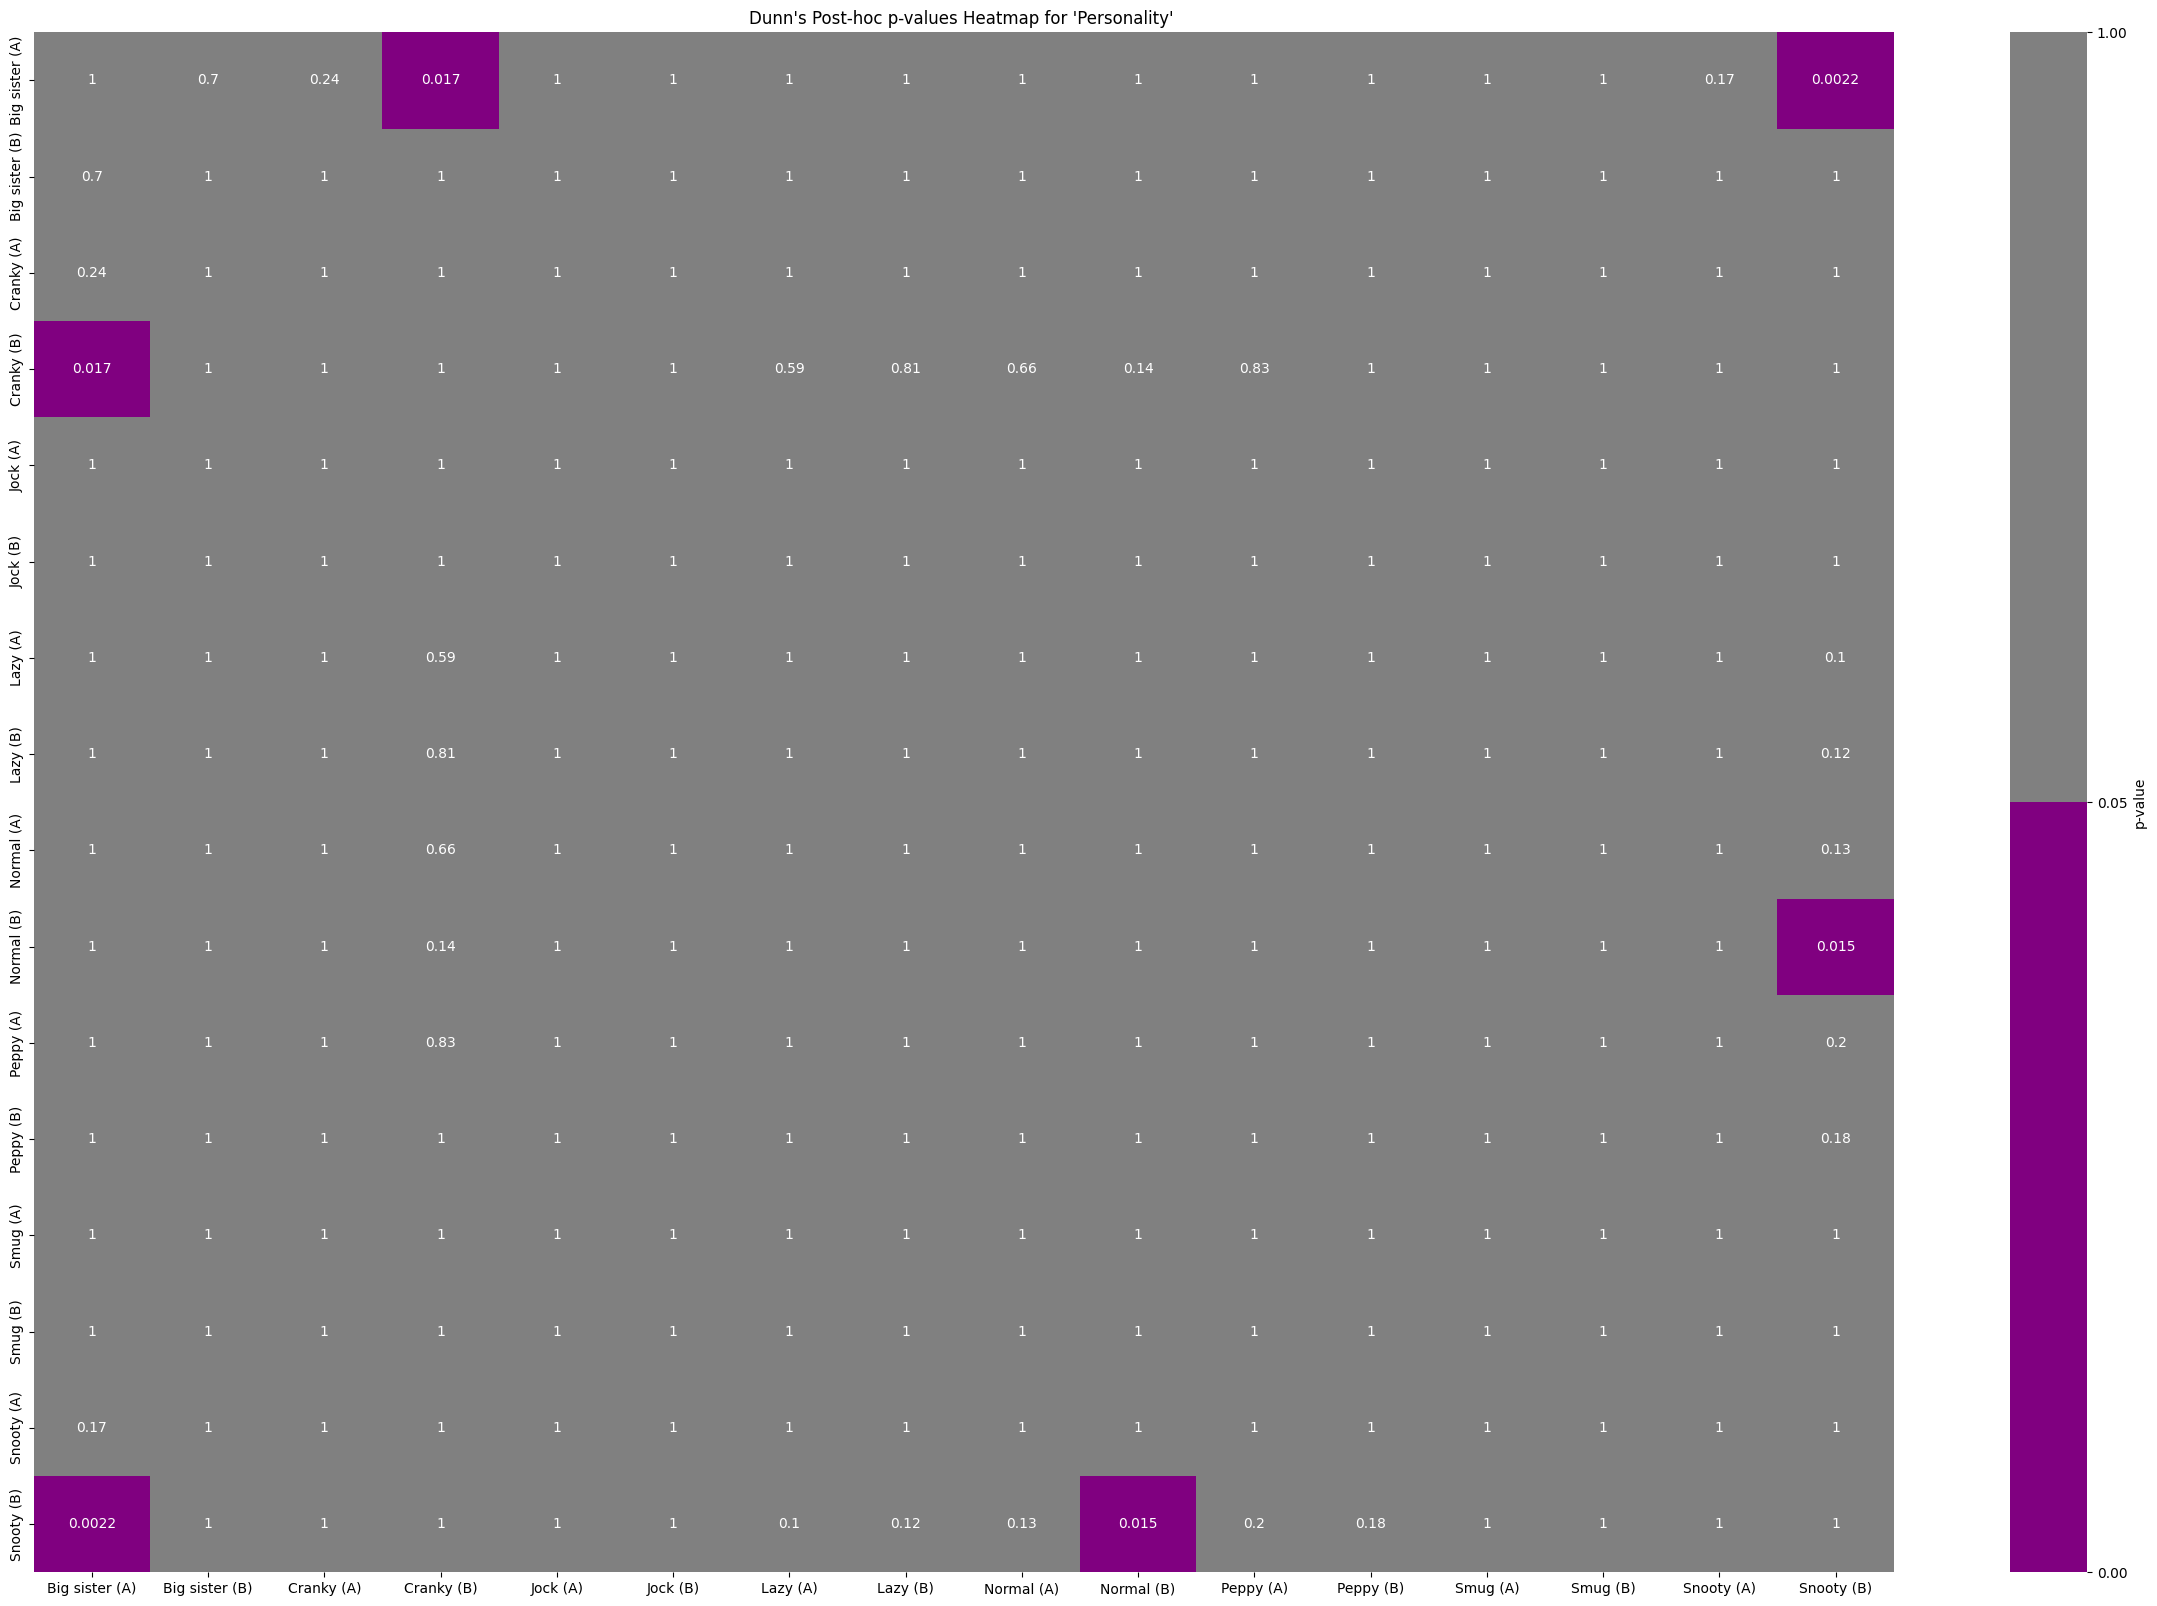

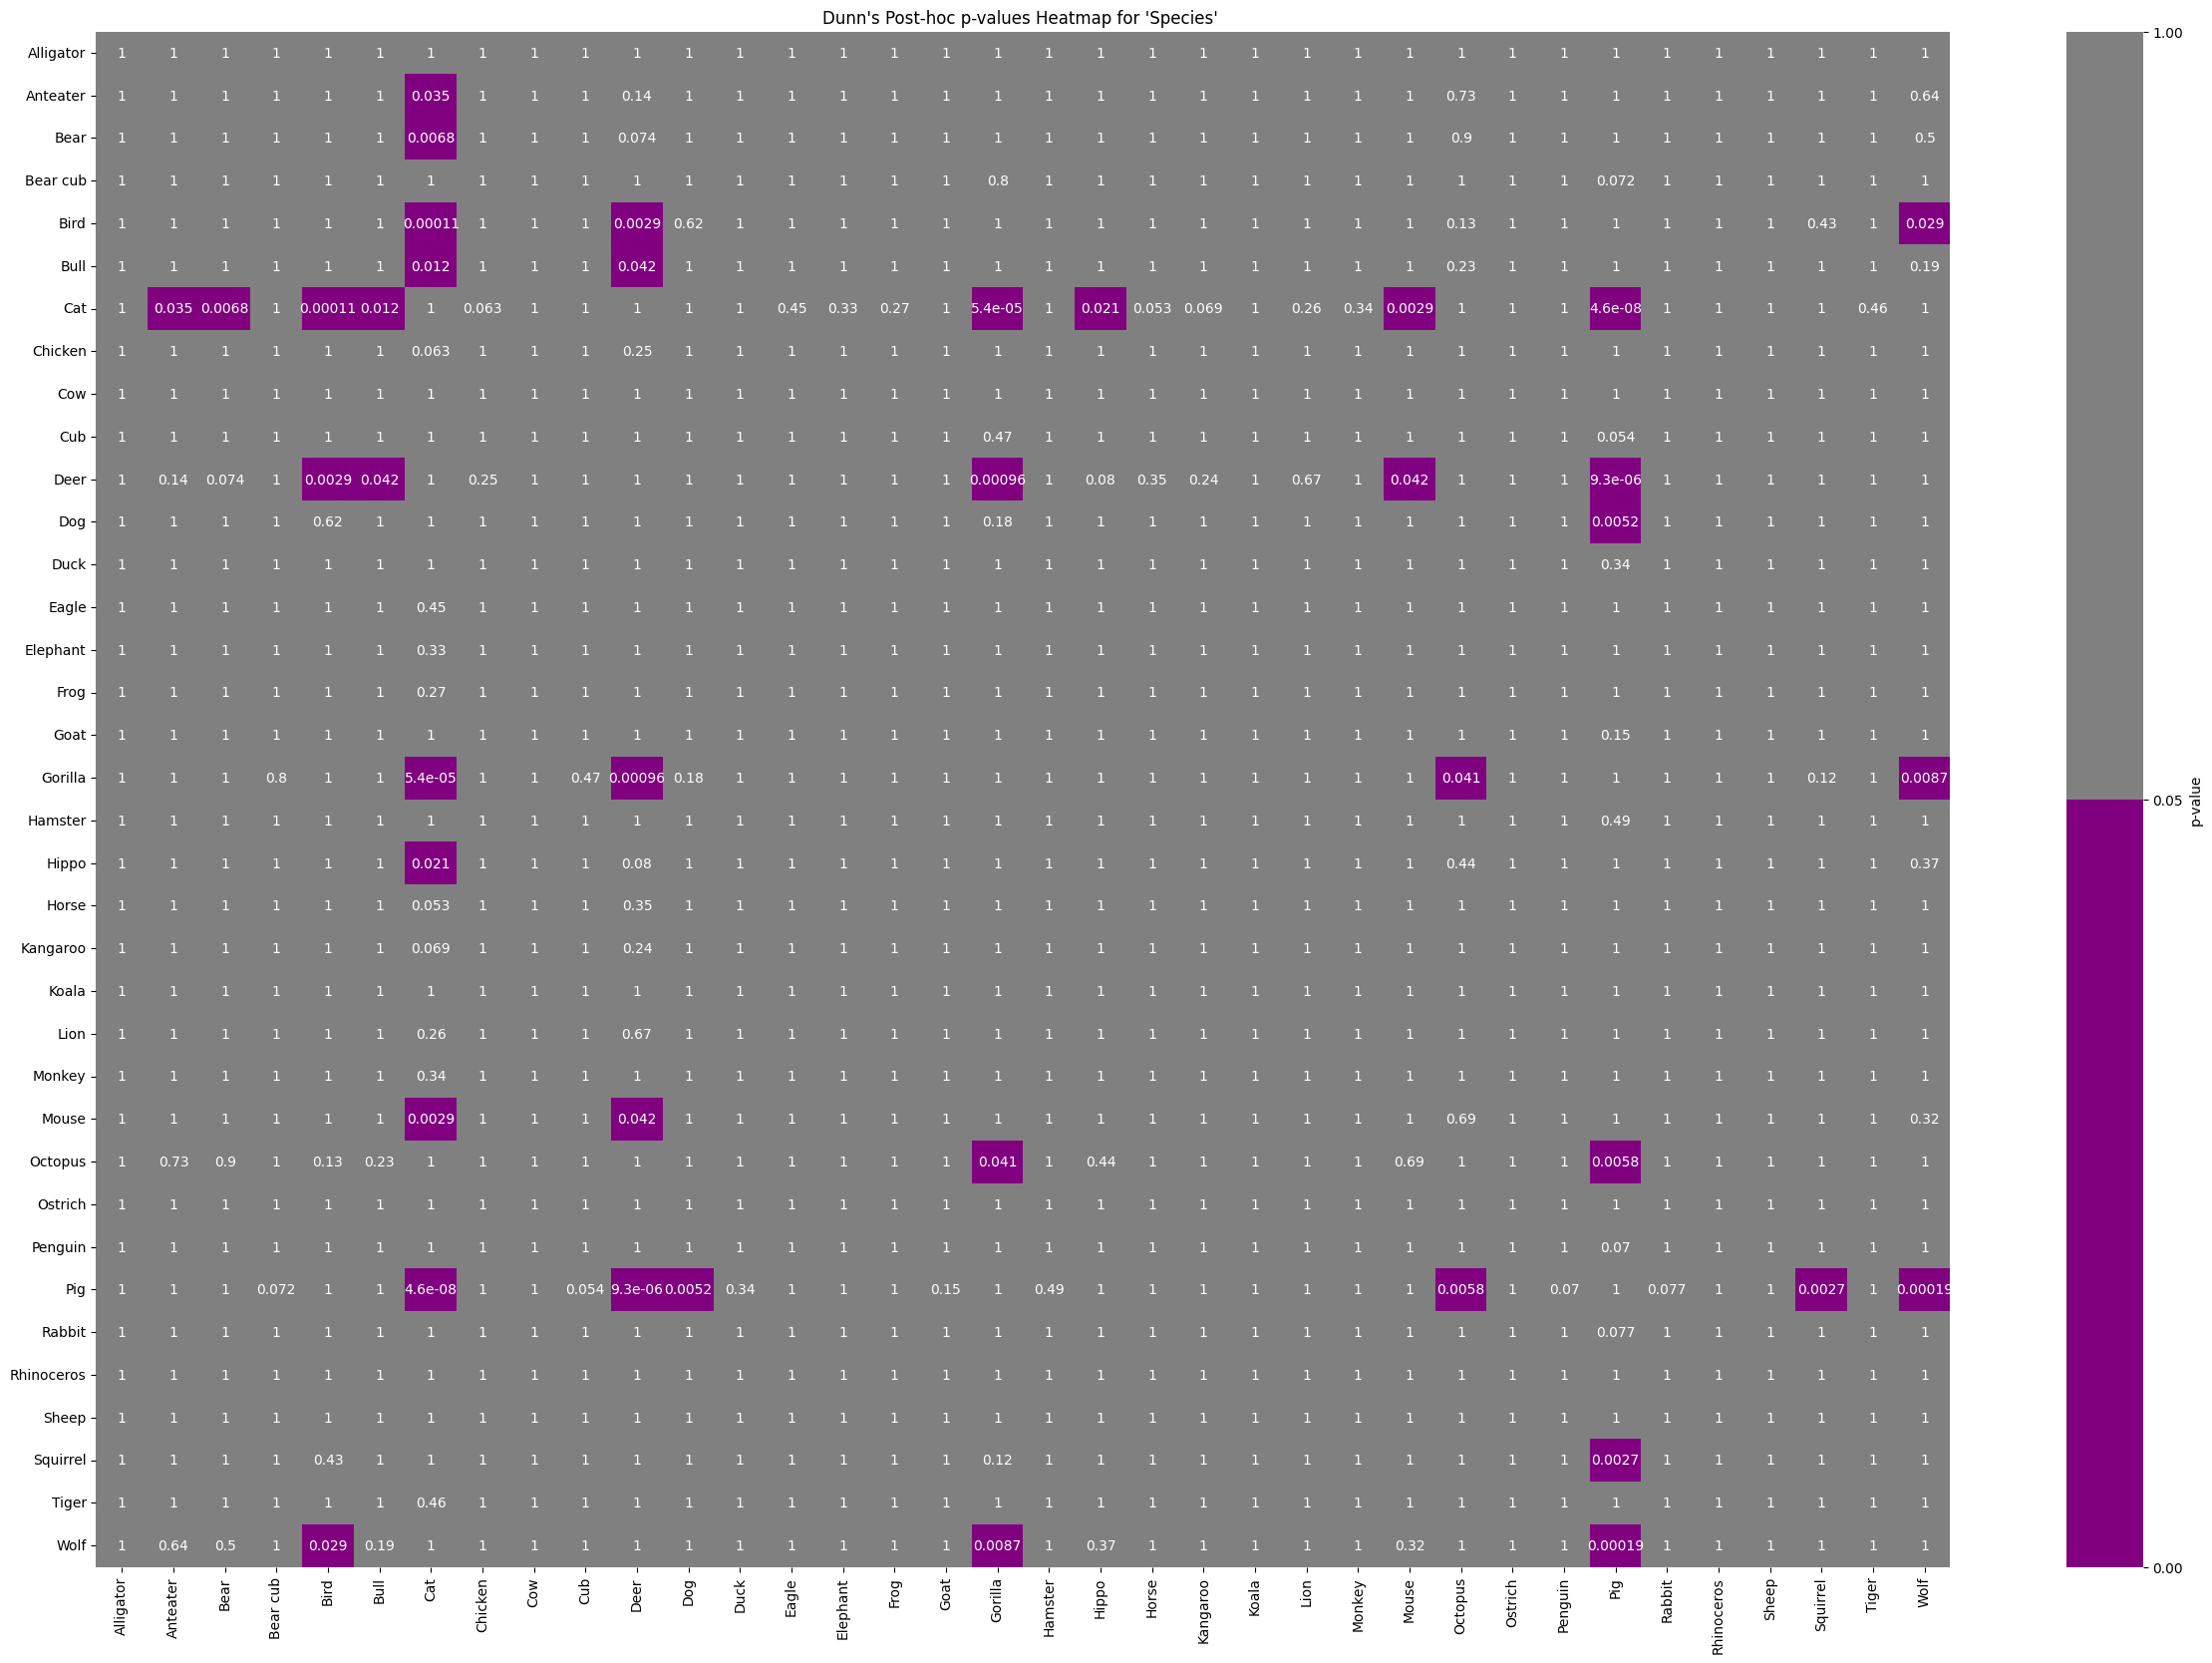

In [115]:
colors = ['purple', 'gray']
cmap = ListedColormap(colors)

boundaries = [0, 0.05, 1.0]
norm = BoundaryNorm(boundaries, ncolors=cmap.N)

for key, value in p_values_dict.items():
    plt.figure(figsize=(30, 20))
    sns.heatmap(value, annot=True, cmap=cmap, norm =norm, vmin= 0, vmax=1, cbar_kws={'label': 'p-value'})
    plt.title(f"Dunn\'s Post-hoc p-values Heatmap for '{key}' ")
    plt.show()


From these matrices:
- The Cat species ranks differently compared to several others, especially Gorilla, Bear, Bull and Hippo. Deer also shows significant rank differences from Gorilla, Bull and Pig. 'Cute'-looking species are ranked very differently i.e way higher than 'bolder'-looking species. This only confirms our hypothesis.
- Cranky (B) and Snooty (B) (mainly negative traits) have significantly different rank distributions compared to Big sister (A) (mainly positive trait).Also, Snooty (B) differs significantly from Normal (B). When accounting for personality, users tend to prefer friendlier villagers compared to aloof and grumpy ones.


## Conclusion

Players’ preferences in Animal Crossing reflect real-world biases: species linked to neotenic, “cute” features rank higher, while bolder, less traditionally cute designs rank lower. Personality matters less but friendly traits are favored. Even in whimsical games, cultural ideals of beauty and appeal subtly shape our choices. This theory could be further explored by comparing multiple rankings over time, to see if these patters remain.